In [115]:
import numpy as np
import pandas as pd

## Load data

Dataset source: <https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset>


In [116]:
df = pd.read_csv('./data/spam.csv', encoding='latin-1')

display(df.shape)
display(df.head())
display(df.info())

(5572, 5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


None

## Clean data


### Transform data


In [117]:
df = df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'])
df = df.rename(columns={'v1': 'target', 'v2': 'text'})

display(df.shape)
display(df.head())

(5572, 2)

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [118]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
target = encoder.fit_transform(df['target'])

display(encoder.classes_)
display(target)

array(['ham', 'spam'], dtype=object)

array([0, 0, 1, ..., 0, 0, 0])

In [119]:
df['target'] = target
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


### Check null values


In [120]:
display(df.isnull().sum())

if df.isnull().values.any():
    df = df.dropna()
    display(df.isnull().sum())
    display('Removed rows with missing values.')

target    0
text      0
dtype: int64

### Remove duplicates


In [121]:
display(df.duplicated().sum())

if df.duplicated().any():
    df = df.drop_duplicates()
    display(df.duplicated().sum())
    display('Removed duplicated rows.')

403

0

'Removed duplicated rows.'

## Exploratory Data Analysis


In [122]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


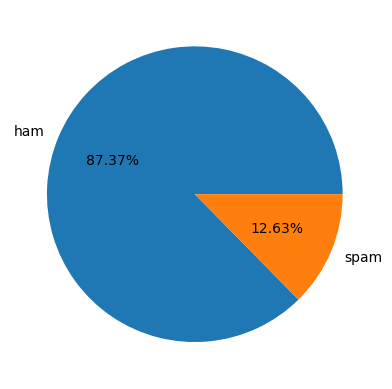

In [134]:
import matplotlib.pyplot as plt

plt.pie(df['target'].value_counts(),
        labels=encoder.classes_.tolist(), autopct='%0.2f%%')
plt.show()